# 1

Compute the Maximal Likelihood Estimation for the Head probability p0:
--> Likelihood function: $ L(p0) = \binom{100}{75} \cdot p_0^{75} \cdot (1-p_0)^{25} $ --> max L(p0) --> $ \frac{dL(p_0)}{dp_0} = 0$ --> $p_0 = 0.75$

Compute its error $\delta p$:

$\frac {\int_{p_0 - \delta p}^{p_0 + \delta p} g(p) \, dp} {\int_{- \inf}^{+ \inf} g(p) \, dp} = 0.95$

$\sigma = \sqrt {\frac {p_0(1-p_0)}{n}}$ --> $\sigma = 0.0433$ --> используем таблицу стандартных нормальных значений: $\delta p = 1.96 \cdot 0.0433 = 0.0849 $. Проверим:

In [6]:
import numpy as np
from scipy.stats import binom
from numpy import trapz
from scipy.optimize import bisect

p0 = 0.75
initial_delta_p = 6
conint = 0.95
step = 0.0001

def g(p):
    return binom.pmf(75, 100, p)

def calculate_ratio(delta_p):
    # Integral 1
    p_values = np.arange(p0 - delta_p, p0 + delta_p + step, step)
    g_values = g(p_values)
    I1 = trapz(g_values, p_values)

    # Integral 2
    p_values_full = np.arange(0, 1 + step, step)
    g_values_full = g(p_values_full)
    I2 = trapz(g_values_full, p_values_full)

    return I1 / I2 - conint

delta_p = bisect(calculate_ratio, 0.0001, 0.1)
print(delta_p)

0.08458320998088022


# 2

Если х1 и х2 являются независимыми случайными величинами, то плотность вероятности $y = x1+x2$ равна произведению плотностей вероятности этих величин --> $f_y(y) = \int_{- \inf}^{+ \inf} f_{x1}(x1) \cdot f_{x2}(y-x1) \, dx1$ . Функция плотности вероятности нормального распределния известна:

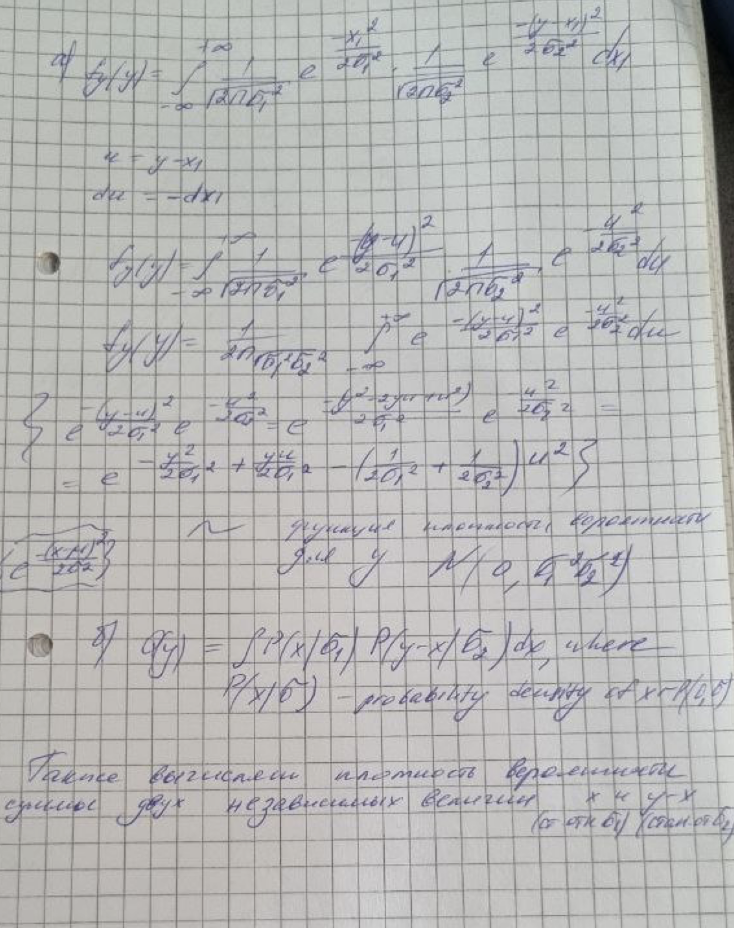

# 5

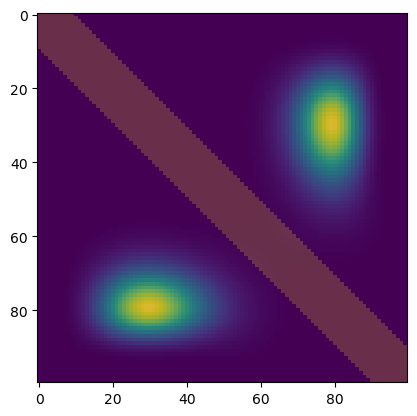

1.5014615528651368e-17


In [8]:
import matplotlib.pyplot as plt
import numpy as np

results = ['TTTTHHHTTTHTTTHHTTTT', 'HHHHHHHHHHHHHTTTHHHH', 'HHHTHHHHHHTHTTHTHHHH']

tf = [True, False]
Zs = [[i, j, k] for i in tf for j in tf for k in tf]

def Pi(Z, p1, p2, i):
    heads = results[i].count('H')
    tails = results[i].count('T')

    p = p2 if Z[i] else p1
    return p ** heads * (1 - p) ** tails

def P(Z, p1, p2):
    return Pi(Z, p1, p2, 0) * Pi(Z, p1, p2, 1) * Pi(Z, p1, p2, 2)

def L(p1, p2):
    return sum([P(Z, p1, p2) for Z in Zs])

likelihoods = np.array([[L(p1, p2) for p1 in np.linspace(0, 1, 100)] for p2 in np.linspace(0, 1, 100)])

mask = [ [ np.abs(p1 - p2) < 0.1 for p1 in np.linspace(0, 1, 100) ] for p2 in np.linspace(0, 1, 100) ]


plt.imshow(likelihoods)
plt.imshow(mask, alpha=0.2)
plt.show()


samecoin = []
for p1 in np.linspace(0, 1, 100):
    for p2 in np.linspace(0, 1, 100):
        likelihood_true = np.prod([Pi([True, True, True], p1, p2, i) for i in range(3)])
        likelihood_false = np.prod([Pi([False, False, False], p1, p2, i) for i in range(3)])
        samecoin.append(likelihood_true + likelihood_false)

samecoin = np.array(samecoin)

print(np.max(samecoin))



# 6

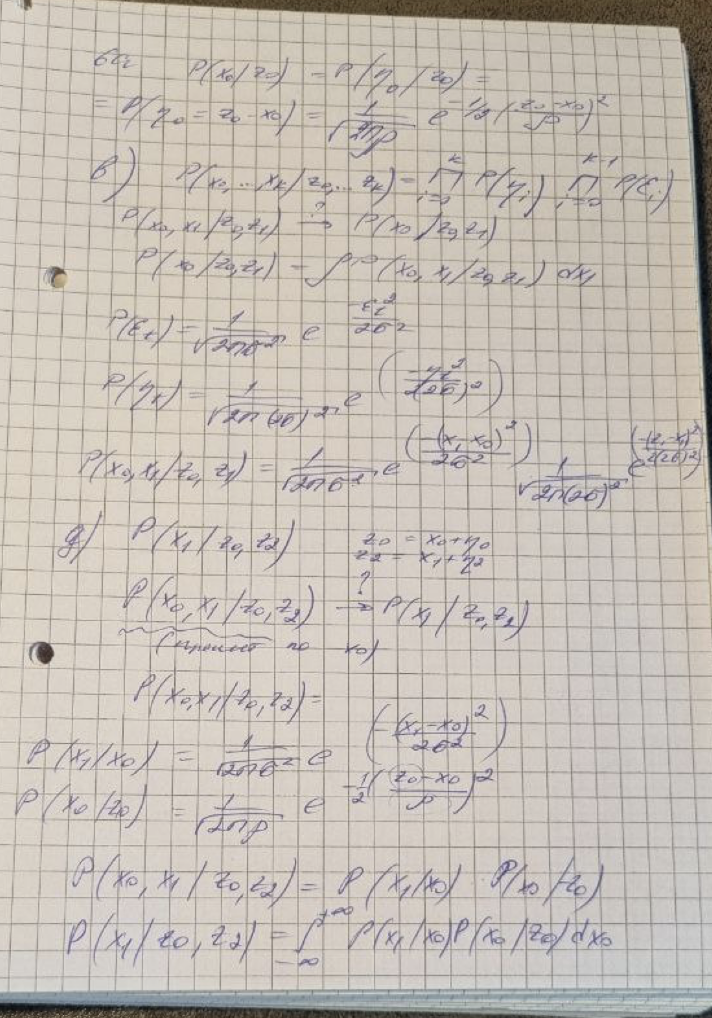

In [9]:
import sympy as sp

x0, x1, z0, z1, epsilon, sigma = sp.symbols('x0 x1 z0 z1 epsilon sigma')
rho = 2 * sigma

P_x0x1z0z1 = (1 / sp.sqrt(2 * sp.pi * sigma**2)) * sp.exp(-(x1 - x0)**2 / (2 * sigma**2)) \
                     * (1 / sp.sqrt(2 * sp.pi * rho**2)) * sp.exp(-(z1 - x1)**2 / (2 * rho**2))

marginal_distribution_x0 = sp.integrate(P_x0x1z0z1, (x1, -sp.oo, sp.oo))
marginal_distribution_x0 = sp.simplify(marginal_distribution_x0)

sp.pretty_print(marginal_distribution_x0)



⎧             2       2              2                                        
⎪      - 20⋅x₀  - 5⋅z₁  + (4⋅x₀ + z₁)                                         
⎪      ───────────────────────────────                                        
⎪                       2                                                     
⎪                   40⋅σ                                                      
⎪ √10⋅ℯ                                       ⎛           π   │               
⎪ ────────────────────────────────────    for ⎜│arg(σ)│ ≤ ─ ∧ │-4⋅arg(σ) + 2⋅a
⎪               10⋅√π⋅σ                       ⎝           4   │               
⎪                                                                             
⎪∞                                                                            
⎪⌠                                                                            
⎨⎮    ⎛           2            2⎞                                             
⎪⎮   -⎝4⋅(x₀ - x₁)  + (x₁ - z₁) ⎠                   

In [10]:
import sympy as sp


x0, x1, sigma, z0, z2, rho = sp.symbols('x0 x1 sigma z0 z2 rho')

# P(x1|x0)
p_x1x0 = sp.exp(-(x1 - x0)**2 / (2 * sigma**2)) / sp.sqrt(2 * sp.pi * sigma**2)
# P(x0|z0)
p_x0z0= sp.exp(-(z0 - x0)**2 / (2 * rho**2)) / sp.sqrt(2 * sp.pi * rho**2)

joint_distribution = p_x1x0 * p_x0z0
marginal_distribution_x0 = sp.integrate(joint_distribution, (x1, -sp.oo, sp.oo))

sp.pretty_print(marginal_distribution_x0)


⎧                        2       2      2              2          2       2   
⎪                      x₀      x₀     x₀     x₀⋅z₀   z₀         x₀      x₀    
⎪                      ────  - ──── - ──── + ───── - ────       ────  - ──── -
⎪                         2       2      2      2       2          2       2  
⎪   ⎛        ⎛√2⋅x₀⎞⎞  2⋅σ     2⋅σ    2⋅ρ      ρ     2⋅ρ        2⋅σ     2⋅σ   
⎪√2⋅⎜2 - erfc⎜─────⎟⎟⋅ℯ    ⋅ℯ                               √2⋅ℯ    ⋅ℯ        
⎪   ⎝        ⎝ 2⋅σ ⎠⎠                                                         
⎪──────────────────────────────────────────────────────── + ──────────────────
⎪                         4⋅√π⋅ρ                                              
⎪                                                                             
⎪                                   ∞                                         
⎪                                   ⌠                                         
⎨                                   ⎮              2

# 4

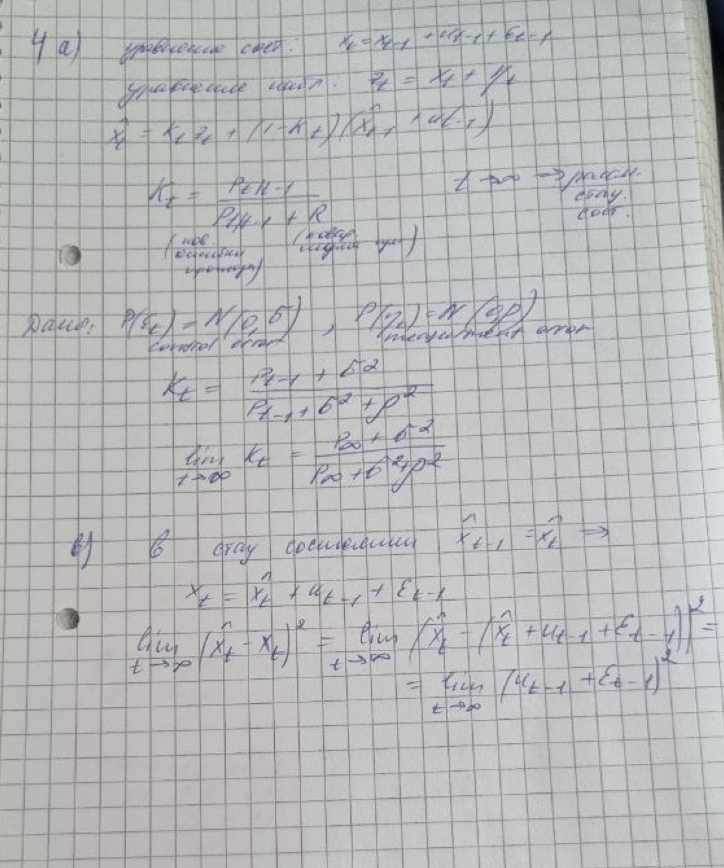

# 3

a) Произведение двух норм функций плостности вероятности = норм функция плотности вероятности. Ответом будет нормальное распределение с  $\Sigma 1 + \Sigma 2$